# Regression - Prediction of Insurance Premium

## Importing Libraries

In [3]:
import pandas as pd # Data Frame  
import  numpy as np 
import matplotlib.pyplot as plt # visulisation 
import seaborn as sns # visualisation
import warnings
warnings.filterwarnings('ignore')

## Importing Data File 

In [4]:
df=pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv')
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [6]:
df.shape

(1338, 8)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

## Null Value Treatment

In [8]:
df['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', nan, 'UW'], dtype=object)

male and female body mass index charts are different in the BMI figures. Men tend to have higher figures than women, while women are allowed to have slightly more fat. That said, the methods for calculating ideal body weight and BMI is relatively the same with both genders, although the numbers used are different.

In [9]:
bmi_range={}
for x in ['PREO','OB1','N','OB2','OB3','UW']:
    min_=df[(df['classif']==x)&(df['sex']=='female')].sort_values('bmi').head(1)
    max_=df[(df['classif']==x)&(df['sex']=='female')].sort_values('bmi',ascending=False).head(1)
    bmi_range[x]=[min_['bmi'].values[0],max_['bmi'].values[0]]

In [10]:
bmi_range_female=pd.DataFrame(bmi_range)
bmi_range_female

,PREO,OB1,N,OB2,OB3,UW
0,25.080,30.02,18.5,35.100,40.15,16.815
1,29.925,34.96,25.0,39.995,48.07,18.335


In [11]:
bmi_range={}
for x in ['PREO','OB1','N','OB2','OB3','UW']:
    min_=df[(df['classif']==x)&(df['sex']=='male')].sort_values('bmi').head(1)
    max_=df[(df['classif']==x)&(df['sex']=='male')].sort_values('bmi',ascending=False).head(1)
    bmi_range[x]=[min_['bmi'].values[0],max_['bmi'].values[0]]

In [12]:
bmi_range_male=pd.DataFrame(bmi_range)
bmi_range_male

,PREO,OB1,N,OB2,OB3,UW
0,25.080,30.00,18.715,35.09,40.15,15.960
1,29.925,34.96,24.985,39.93,53.13,18.335


In [13]:
df.drop('classif',axis=1,inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,0,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [14]:
cat=[]
num=[]
for x in df.columns:
    if df[x].nunique()<50:
        cat.append(x)
    else:
        num.append(x)

In [15]:
cat

['sex', 'children', 'smoker', 'region']

In [16]:
num

['age', 'bmi', 'charges']

## Univariante Analysis

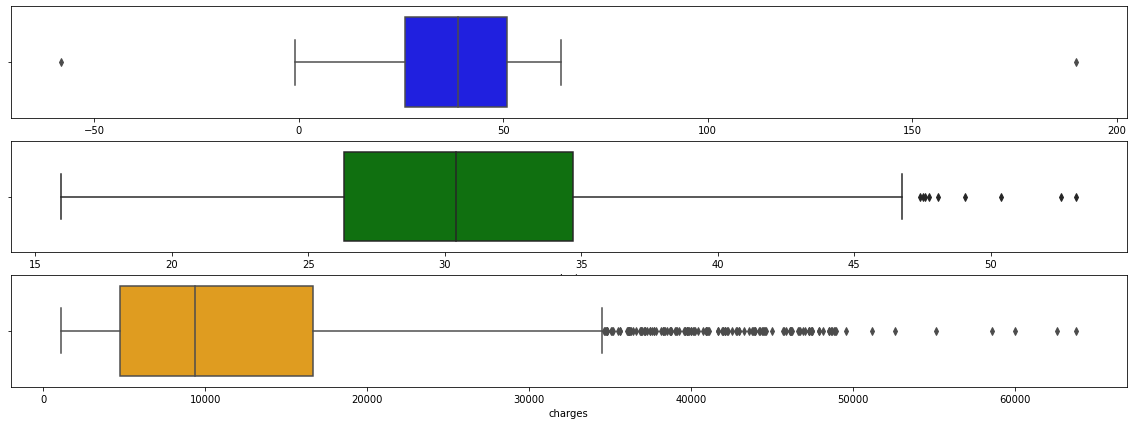

In [17]:
fig,ax=plt.subplots(3,1,figsize=(20,7))
sns.boxplot(data=df,x='age',ax=ax[0],color='blue')
sns.boxplot(data=df,x='bmi',ax=ax[1],color='green')
sns.boxplot(data=df,x='charges',ax=ax[2],color='orange')
plt.show()

Blue= Age, Green =BMI, Orange = Charges

## outlier treatment

In [18]:
limit=df.describe()
limit 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [19]:
q1=df['age'].describe()[4]
q3=df['age'].describe()[6]
iqr=q3-q1
uf=q3+(1.2*iqr)
lf=q1-(1*iqr)
print(uf,lf)

81.0 1.0


### we can observe the outlier in the age those are  unacceptable

In [20]:
def outlier_treat(x):
    q1=df[x].describe()[4]
    q3=df[x].describe()[6]
    iqr=q3-q1
    uf=q3+(1.2*iqr)
    lf=q1-(1*iqr)
    out=[]
    outind=[]
    out=[a for a in df[x] if ((a<lf)|(a>uf))]
    outind=df.index[df[x].isin(out)]
    return outind

In [21]:
df.drop(outlier_treat('age'),axis=0,inplace=True)

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


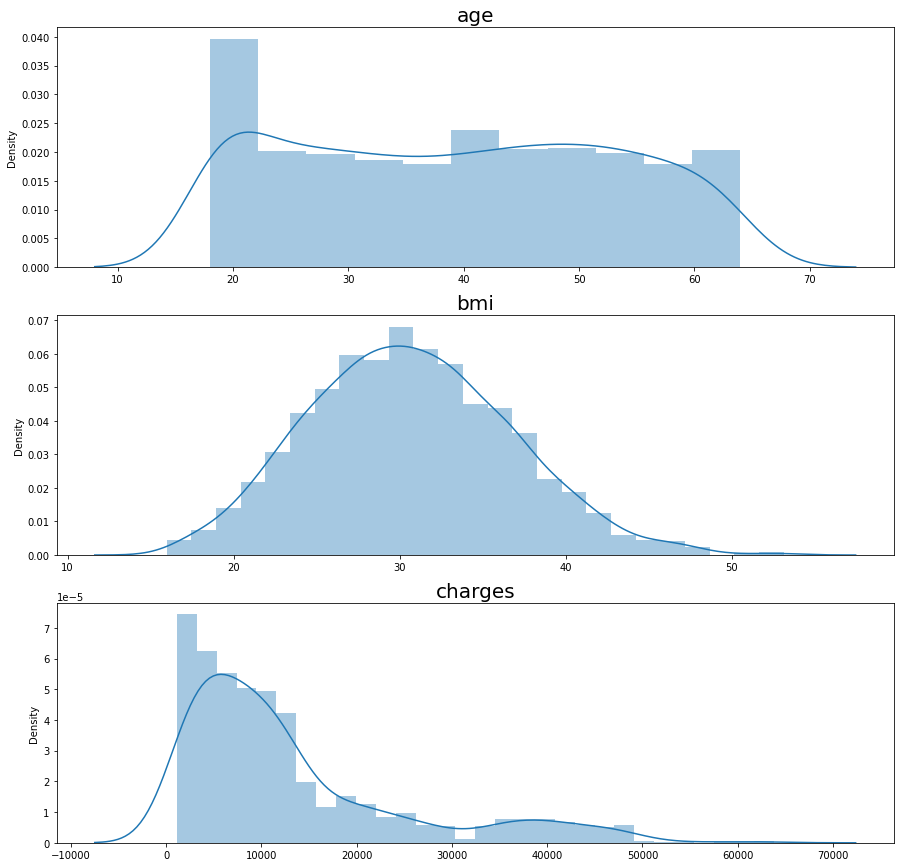

In [23]:
b=list(enumerate(num))
plt.figure(figsize=(15,15))
for x in b:
    plt.subplot(3,1,x[0]+1)
    sns.distplot(x=df[x[1]])
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

From the AGE plot we are able to tell that majority of customer are appling for the insurance at early age 18 to 22.on probability point of veiw there is high changes that next customer for insurence having age between 18 to 22.

From the BMI plot which in normally distributed the majority falls in PreO , Obs1.
on probability point of veiw there is high changes that next customer for insurence belonges preO and Obs1 .

From the CHARGES plt which is Right skewed (normally + exponencially distributed) the majority of customers have less premium.
on probability point of veiw there is high changes that next customer for insurence have less premium..

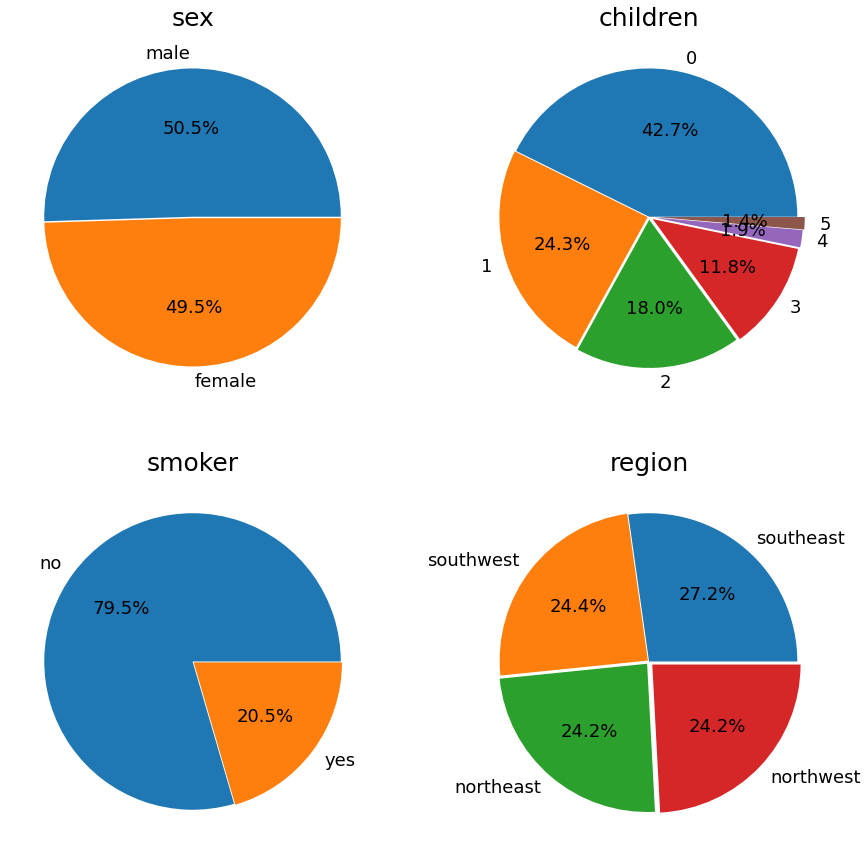

In [24]:
b=list(enumerate(cat))
plt.figure(figsize=(15,15))
for x in b:
    plt.subplot(2,2,x[0]+1)
    l=[]
    for a in range(df[x[1]].nunique()):
        l.append(a*0.01)
    plt.pie(x = df[x[1]].value_counts(), autopct = "%.1f%%", labels = df[x[1]].value_counts().keys(),explode=l,textprops={'fontsize':18})
    plt.title(f"{x[1]}",fontsize=25)
plt.show()

we can depict the probabilty of possible next customer on the basis of sex and region .
but me can make assumption on the basis of that high probality that next customer can be non smoker and who don't have children

## Bivariate Analysis

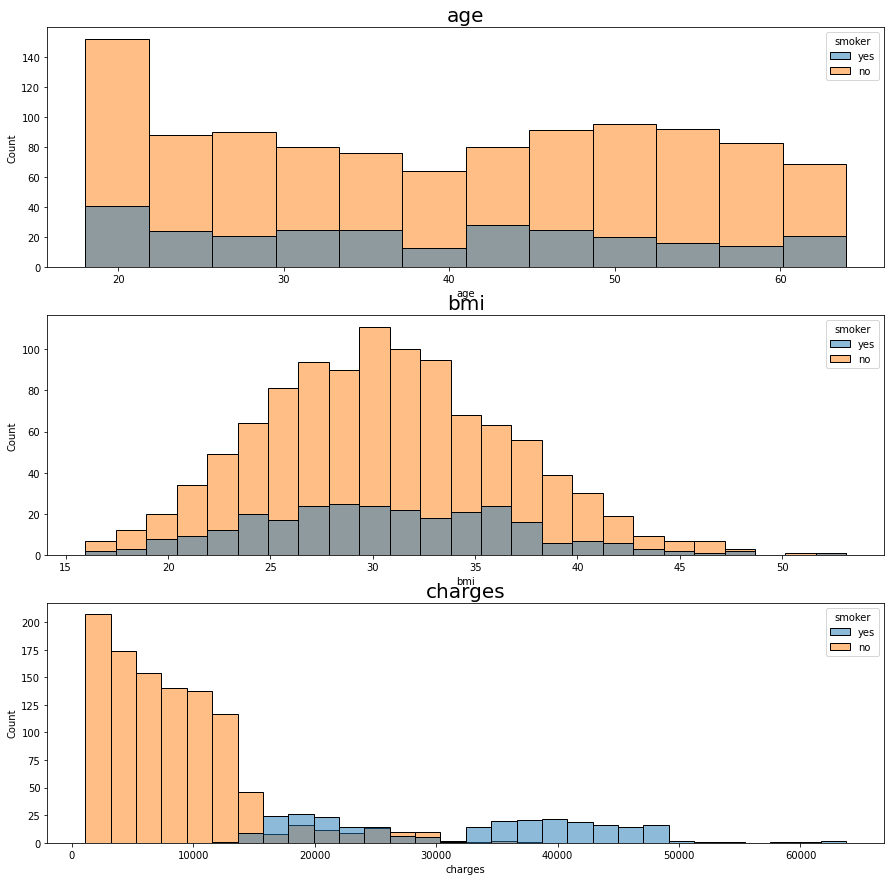

In [25]:
b=list(enumerate(num))
plt.figure(figsize=(15,15))
for x in b:
    plt.subplot(3,1,x[0]+1)
    sns.histplot(x=x[1],hue='smoker',data=df)
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

Most smoker were are paying high premiums

## Mutlivariate Analysis

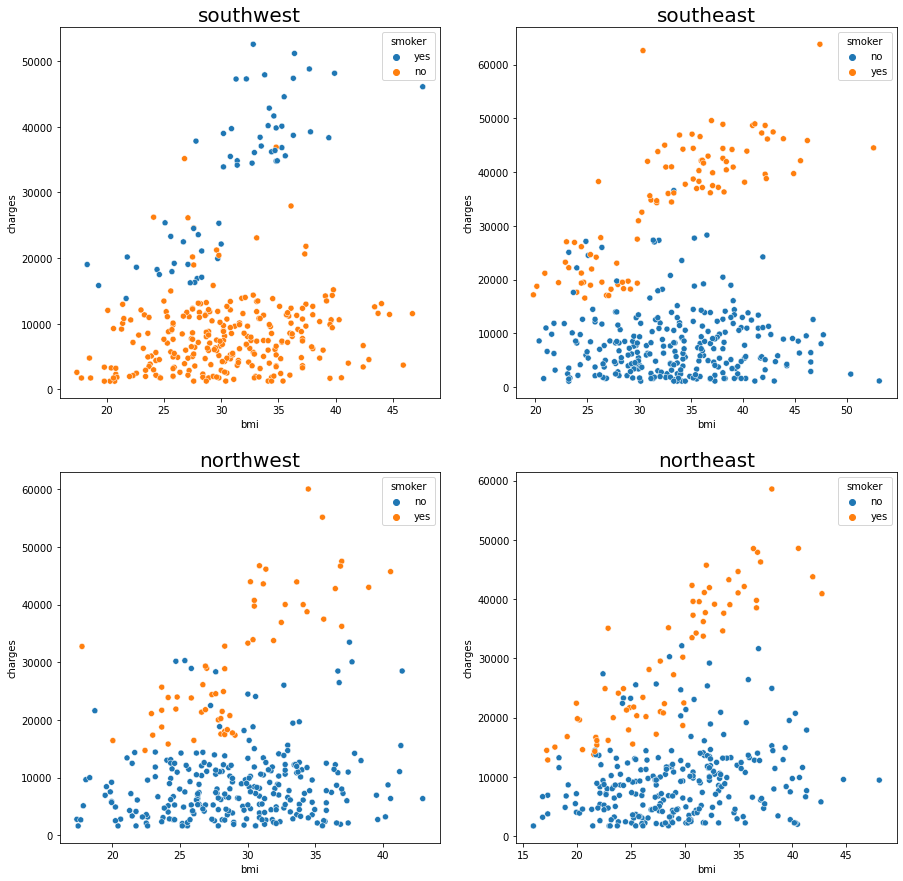

In [26]:
b=list(enumerate(df.region.unique()))
plt.figure(figsize=(15,15))
for x in b:
    plt.subplot(2,2,x[0]+1)
    sns.scatterplot('bmi','charges','smoker',data=df[df['region']==x[1]])
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

All smokers are paying high premium in all region.

## Preprocessing Data

In [27]:
X=df

In [28]:
X['smoker'] = df['smoker'] == 'yes'
X['smoker'].value_counts()

False    1060
True      273
Name: smoker, dtype: int64

In [29]:
X=pd.get_dummies(X)
X2=X.copy()
X2

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,True,16884.9240,1,0,0,0,0,1
1,18,33.77,1,False,1725.5523,0,1,0,0,1,0
2,28,33.00,3,False,4449.4620,0,1,0,0,1,0
4,32,28.88,0,False,3866.8552,0,1,0,1,0,0
5,31,25.74,0,False,3756.6216,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.70,3,False,11411.6850,1,0,0,0,0,1
1333,50,30.97,3,False,10600.5483,0,1,0,1,0,0
1334,18,31.92,0,False,2205.9808,1,0,1,0,0,0
1335,18,36.85,0,False,1629.8335,1,0,0,0,1,0


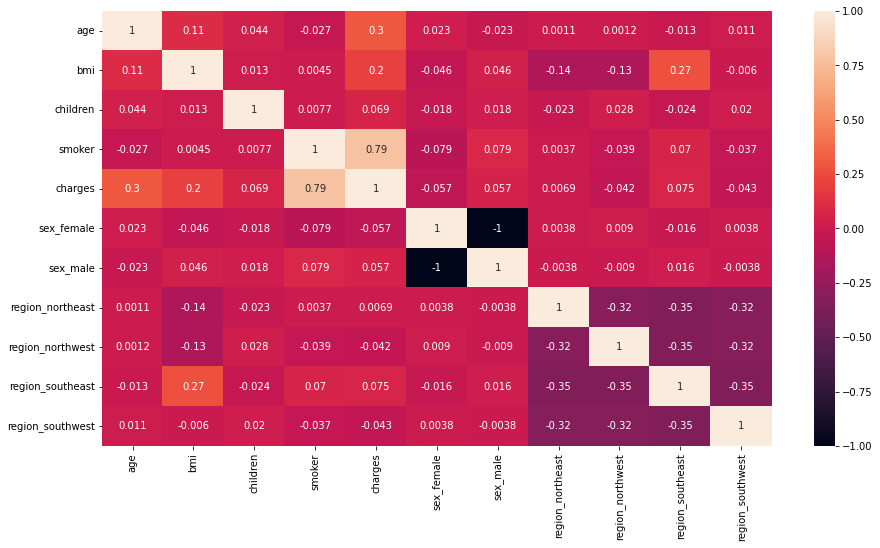

In [30]:
fig=plt.subplots(figsize=(15,8))
sns.heatmap(X2.corr(),annot=True)
plt.show()

In [31]:
y=X.charges
X=X[['age','bmi','children','smoker']]

In [32]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##linear Regression 

In [33]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=14)
scores1 = []
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    lr = LinearRegression()
    lr1 = lr.fit(X_train,y_train)
    s = lr1.score(X_val, y_val)
    print(s)
    scores1.append(s)

0.6725961708124397
0.6968823242444437
0.6196680789609186
0.8456731792117831
0.7952630486042266
0.8165468232525199
0.7642860892988139
0.7906932156215051
0.7783689208410318
0.7486077633655916
0.6716364158773133
0.6928741624247452
0.8164415142889343
0.7322399870525158


In [34]:
pred1=lr1.predict(X_test)
print(lr1.score(X_test,y_test))

0.7405373791510503


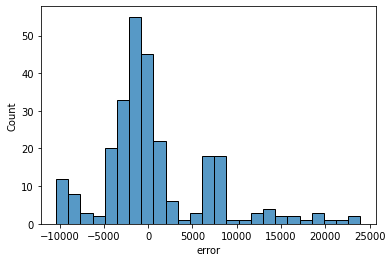

In [35]:
plot1=pd.DataFrame({'Actual':y_test,'Predicted':pred1})
plot1['error']=plot1.Actual-plot1.Predicted
sns.histplot(plot1['error'])
plt.show()

##Linear Regression Ridge

In [36]:
from sklearn.linear_model import Ridge
kf = KFold(n_splits=14)
scores2 = []
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    lr_ = Ridge()
    lrr = lr_.fit(X_train,y_train)
    s = lrr.score(X_val, y_val)
    print(s)
    scores2.append(s)

0.6725107881640799
0.6972957426637929
0.6203063649223954
0.8453585229597685
0.7942107454657156
0.816932002714017
0.7640425803739341
0.7908846523026027
0.7779770190461888
0.7493640718740826
0.6712414333047099
0.6938824725867723
0.8163129256257209
0.7320243007290408


In [37]:
pred2=lrr.predict(X_test)
print(lrr.score(X_test,y_test))

0.7399628872261343


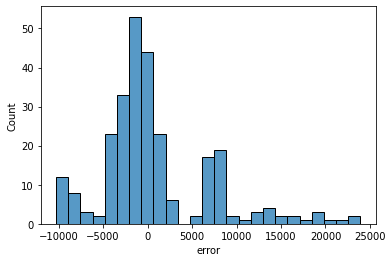

In [38]:
plot2=pd.DataFrame({'Actual':y_test,'Predicted':pred2})
plot2['error']=plot2.Actual-plot2.Predicted
sns.histplot(plot2['error'])
plt.show()

## Linear regression Lasso

In [39]:
from sklearn.linear_model import Lasso
kf = KFold(n_splits=14)
scores3 = []
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    ltr = Lasso()
    lrl = ltr.fit(X_train,y_train)
    s = lrl.score(X_val, y_val)
    print(s)
    scores3.append(s)

0.672578852330706
0.6969042561595293
0.6196769556007106
0.8456684761236257
0.7952207171817816
0.8165677938564575
0.7642933528748128
0.7907006587700486
0.7783541836674545
0.7486370529136803
0.6716241765103331
0.6929031462811996
0.8164387390892448
0.7322415499525388


In [40]:
pred3=lrl.predict(X_test)
print(lrl.score(X_test,y_test))

0.7405204329033692


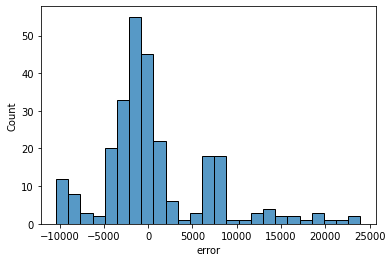

In [41]:
plot3=pd.DataFrame({'Actual':y_test,'Predicted':pred3})
plot3['error']=plot3.Actual-plot3.Predicted
sns.histplot(plot3['error'])
plt.show()

## Decision Tree Regressor 

In [42]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=21)
scores = []
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'],'max_depth': [2,4,6]}
    dtr = tree.DecisionTreeRegressor()
    dtr_cv=GridSearchCV(dtr,grid, cv=5)
    dtr_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",dtr_cv.best_params_)
    dtr = tree.DecisionTreeRegressor(criterion=dtr_cv.best_params_['criterion'], max_depth=dtr_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = dtr.score(X_val, y_val)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'absolute_error', 'max_depth': 4}
0.7651729657810064
tuned hpyerparameters :(best parameters)  {'criterion': 'absolute_error', 'max_depth': 4}
0.8040388001855865
tuned hpyerparameters :(best parameters)  {'criterion': 'squared_error', 'max_depth': 4}
0.7378112822116532
tuned hpyerparameters :(best parameters)  {'criterion': 'squared_error', 'max_depth': 4}
0.6622445915353646
tuned hpyerparameters :(best parameters)  {'criterion': 'absolute_error', 'max_depth': 4}
0.8498043693747832
tuned hpyerparameters :(best parameters)  {'criterion': 'absolute_error', 'max_depth': 4}
0.9494711359320448
tuned hpyerparameters :(best parameters)  {'criterion': 'absolute_error', 'max_depth': 4}
0.9063602133391843
tuned hpyerparameters :(best parameters)  {'criterion': 'absolute_error', 'max_depth': 4}
0.9907063776536777
tuned hpyerparameters :(best parameters)  {'criterion': 'squared_error', 'max_depth': 4}
0.9098316165381438
tuned hpyerparameters 

In [43]:
dtr = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=4).fit(X_train, y_train)
print(dtr.score(X_test, y_test))

0.833688427791744


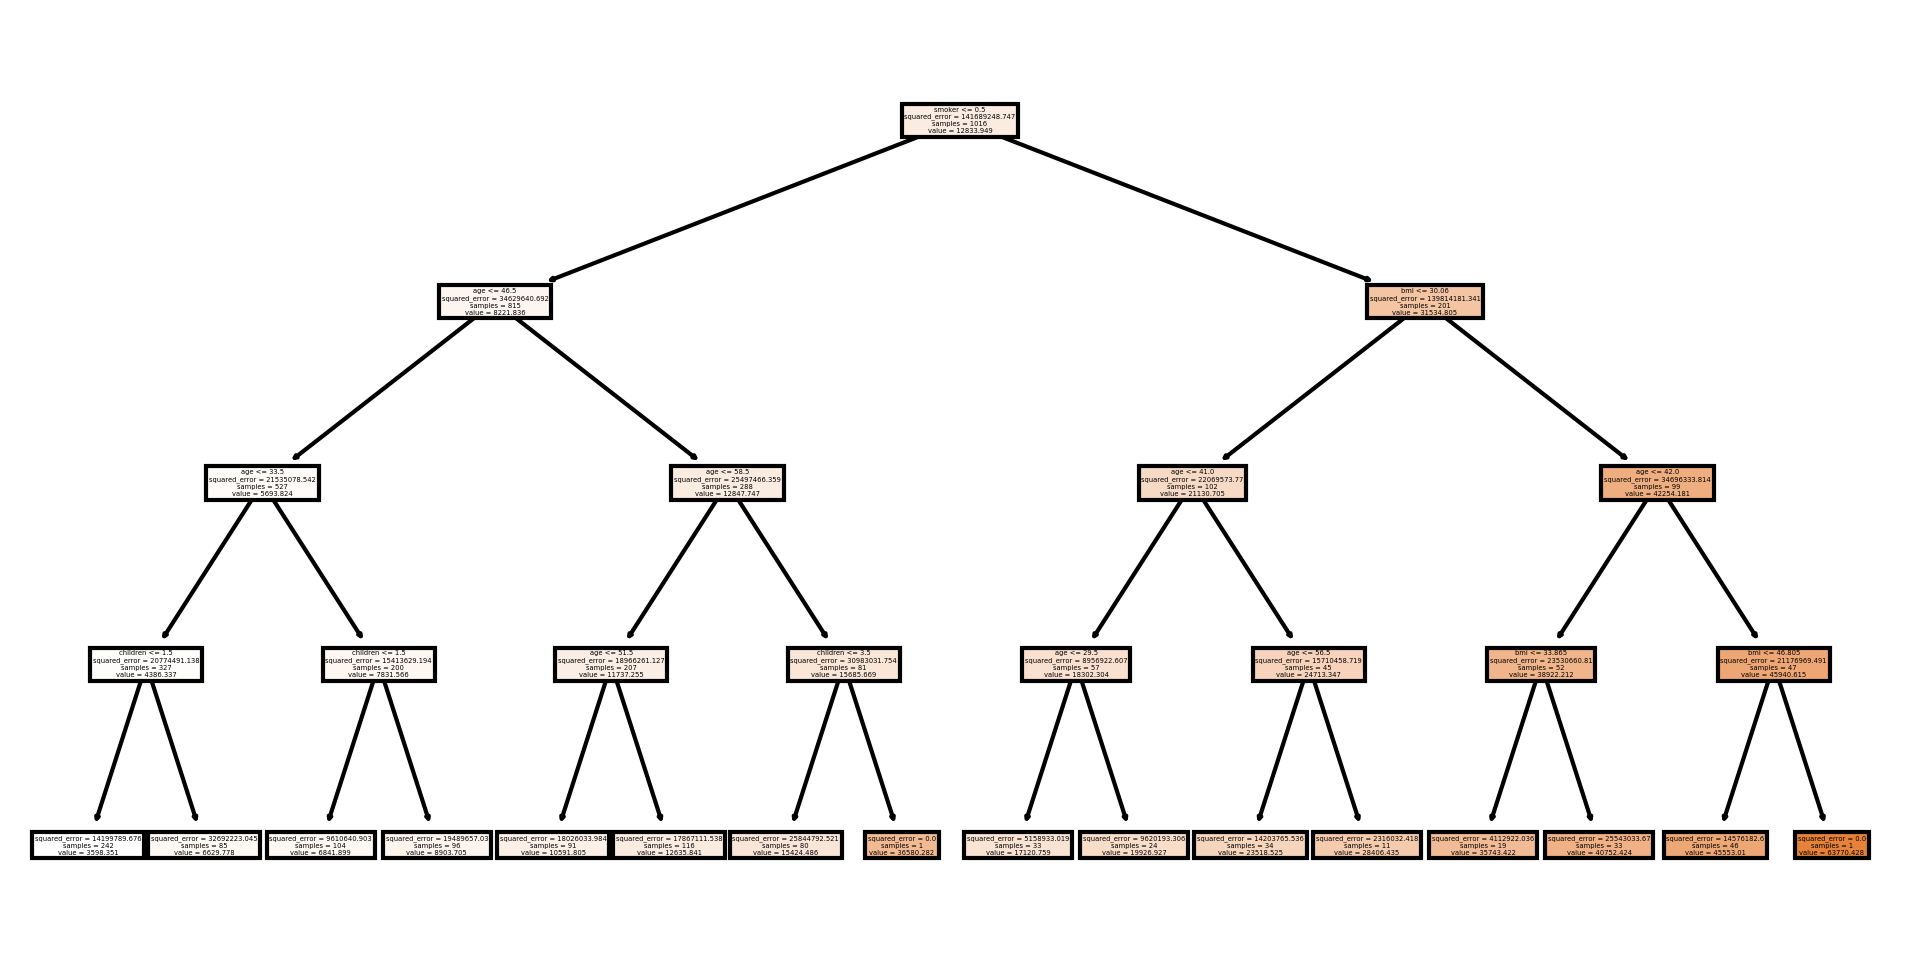

In [44]:
fig,ax= plt.subplots(figsize =(8,4),dpi=300)
tree.plot_tree(dtr,feature_names = X.columns, filled = True)
plt.show()

In [45]:
pred=dtr.predict(X_test)
pred

array([45553.00990848,  6841.89905106,  6841.89905106,  8903.70502448,
        6841.89905106, 10591.80508857, 12635.84091871, 10591.80508857,
       19926.92693125,  6629.77848659,  6841.89905106, 12635.84091871,
        6629.77848659, 23518.524735  , 12635.84091871, 15424.48632113,
        6629.77848659,  3598.35124074,  3598.35124074,  3598.35124074,
       12635.84091871,  6629.77848659, 10591.80508857,  3598.35124074,
        6841.89905106, 23518.524735  , 15424.48632113, 12635.84091871,
        8903.70502448, 10591.80508857,  3598.35124074,  3598.35124074,
        8903.70502448, 19926.92693125, 23518.524735  , 19926.92693125,
       15424.48632113, 40752.42438364, 45553.00990848,  8903.70502448,
        6841.89905106,  3598.35124074, 35743.42226737,  3598.35124074,
        3598.35124074, 12635.84091871, 12635.84091871, 12635.84091871,
       17120.75945909, 12635.84091871,  6629.77848659, 15424.48632113,
       17120.75945909, 19926.92693125, 40752.42438364,  6629.77848659,
      

In [46]:
plot=pd.DataFrame({'Actual':y_test,'Predicted':pred})
plot['error']=plot.Actual-plot.Predicted
plot


,Actual,Predicted,error
901,48673.55880,45553.009908,3120.548892
1065,7045.49900,6841.899051,203.599949
1254,4415.15880,6841.899051,-2426.740251
300,6746.74250,8903.705024,-2156.962524
239,7152.67140,6841.899051,310.772349
...,...,...,...
641,32787.45859,23518.524735,9268.933855
536,5972.37800,6629.778487,-657.400487
544,10231.49990,12635.840919,-2404.341019
898,1634.57340,3598.351241,-1963.777841


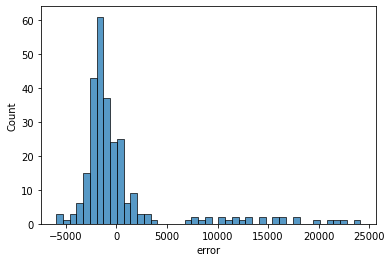

In [47]:
sns.histplot(plot['error'])
plt.show()

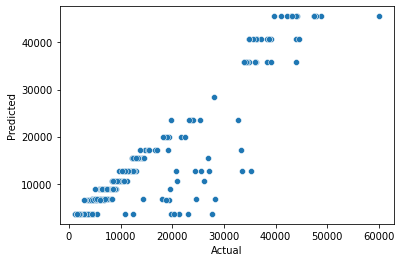

In [48]:
sns.scatterplot(x=plot.Actual,y=plot.Predicted)

plt.show()

## Ensambling boosting (sequential)

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

result=list()
ada = AdaBoostRegressor()
cv=RepeatedKFold(n_splits=14, n_repeats=25)
ada_scores = cross_val_score(ada, X1, y1, cv=cv,scoring='r2', n_jobs=-1, error_score='raise')
result.append(ada_scores)
print(mean(ada_scores), std(ada_scores))

0.8099918136568204 0.057060505082730674


0.8018821547171213


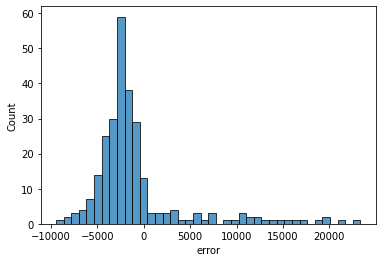

In [50]:
from sklearn.metrics import r2_score
ada1=ada.fit(X1,y1)
predict=ada1.predict(X_test)
print(r2_score(predict,y_test))
plot_ada=pd.DataFrame({'Actual':y_test,'Predicted':predict})
plot_ada['error']=plot_ada.Actual-plot_ada.Predicted
sns.histplot(plot_ada['error'])
plt.show()


# Train,validate,test

In [51]:
scores4 = []
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    ada = AdaBoostRegressor()
    ada1=ada.fit(X_train,y_train)
    s = ada1.score(X_val, y_val)
    print(s)
    scores4.append(s)


0.7629435432440865
0.7814003653065993
0.757191300887316
0.6853323456392801
0.7852050553853879
0.7936800426671867
0.8560082186501314
0.9366297463575933
0.7862199708528754
0.8003515739141759
0.8616680747469072
0.9219188422004084
0.8640493151418875
0.8128615474702348
0.8374393810107489
0.7220812785040045
0.8253295074422089
0.7456708708223536
0.880076504237587
0.8334236449071176
0.8114489990189634


In [52]:
predict_ada=ada1.predict(X_test)
print(r2_score(predict_ada,y_test))

0.7686096681672296


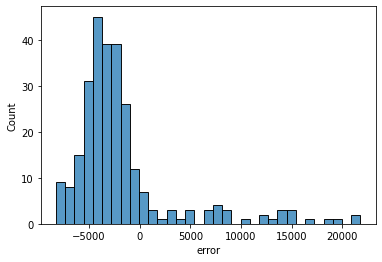

In [53]:
plot_ada=pd.DataFrame({'Actual':y_test,'Predicted':predict_ada})
plot_ada['error']=plot_ada.Actual-plot_ada.Predicted
sns.histplot(plot_ada['error'])
plt.show()

## Ensambling bagging (parallel)

In [54]:
from sklearn.ensemble import RandomForestRegressor
results1=()
rfr=RandomForestRegressor()
cv=RepeatedKFold(n_splits=14, n_repeats=25)
rfr_score=cross_val_score(rfr,X1,y1,cv=cv,scoring='r2',n_jobs=-1, error_score='raise')
result.append(rfr_score)
print(mean(rfr_score),std(rfr_score))

0.8278952149702857 0.06172152887892567


0.8097825264685616


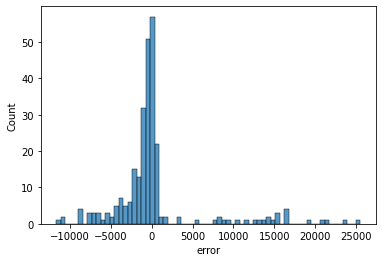

In [55]:
rfr1=rfr.fit(X1,y1)
predict=rfr1.predict(X_test)
print(r2_score(y_test,predict))
plot_rfr=pd.DataFrame({'Actual':y_test,'Predicted':predict})
plot_rfr['error']=plot_rfr.Actual-plot_rfr.Predicted
sns.histplot(plot_rfr['error'])
plt.show()

# Train,validate,test

In [56]:
scores5 = []
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    rfr=RandomForestRegressor()
    rfr1=rfr.fit(X_train,y_train)
    s = rfr1.score(X_val, y_val)
    print(s)
    scores5.append(s)


0.7867548558772665
0.8357489963899994
0.7093627993821772
0.6518249503461687
0.8434732355302995
0.8168922718270331
0.8631390842961559
0.9507736495921079
0.9376456239036153
0.7957983920135453
0.865023894831032
0.9374618195451456
0.8455613419958896
0.8447003519544486
0.82889891705171
0.7043505755045475
0.8167865377359518
0.7819851212657857
0.928538691282858
0.8433982359029077
0.8088424925454343


In [57]:
predict_rfr=rfr1.predict(X_test)
print(r2_score(predict_rfr,y_test))

0.7891022882249401


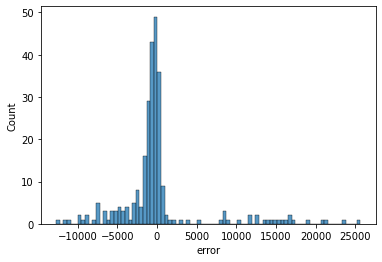

In [58]:
plot_rfr=pd.DataFrame({'Actual':y_test,'Predicted':predict_rfr})
plot_rfr['error']=plot_rfr.Actual-plot_rfr.Predicted
sns.histplot(plot_rfr['error'])
plt.show()

# Deep Neural network

In [62]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [63]:
X1=X1.astype('float')
X_test=X_test.astype('float')

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

# Making Model to Learn

In [65]:
tf.random.set_seed(42)
l0 = tf.keras.layers.Dense(units=10,activation=tf.keras.activations.linear)
l1 = tf.keras.layers.Dense(units=15)
l2 = tf.keras.layers.Dense(units=10)
l3 = tf.keras.layers.Dense(units=5)
l4 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1,l2,l3,l4])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01),metrics='mae')
history=model.fit(X_train, y_train, epochs=120,verbose=False,validation_data = (X_val, y_val))

Text(0.5, 0, 'epochs')

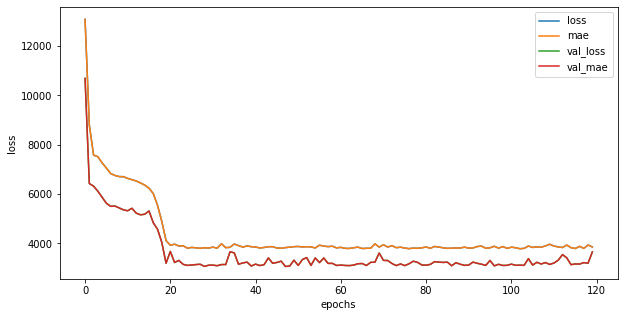

In [66]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.ylabel('loss')
plt.xlabel('epochs')

In [67]:
print("Finished training the model")
prediction=model.predict(X_test)
prediction
task=pd.DataFrame({'Actual':y_test,'Predicted':prediction.reshape(-1)})
task['error']=task.Actual-task.Predicted
task

Finished training the model


,Actual,Predicted,error
901,48673.55880,27554.708984,21118.849816
1065,7045.49900,6565.303711,480.195289
1254,4415.15880,4223.412598,191.746202
300,6746.74250,5898.000488,848.742012
239,7152.67140,7246.189453,-93.518053
...,...,...,...
641,32787.45859,24090.753906,8696.704684
536,5972.37800,5318.907715,653.470285
544,10231.49990,9217.636719,1013.863181
898,1634.57340,438.809296,1195.764104


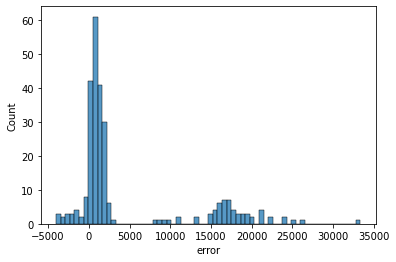

In [68]:
sns.histplot(task.error)
plt.show()

# The best feature for the smoker, bmi , children and age.
# The best algo is Decision Tree Regressor. 